In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi': 600})
plt.rcParams['font.sans-serif'] = 'Times New Roman'
import seaborn as sns
import plotly.express as px
import ast
from collections import Counter

In [2]:
data = pd.read_csv('/Users/ainsleylewis/Documents/Astronomy/arXiver/2025_Data.csv')

In [3]:
# Month Column
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month

In [4]:
# Average number of words in title per paper
data['title_word_count'] = data['title'].apply(lambda x: len(str(x).split()))
avg_title_word_count = data['title_word_count'].mean()
print(f'Average number of words in title per paper: {avg_title_word_count:.2f}')

Average number of words in title per paper: 12.59


In [5]:
# Average number of words in abstract per paper
data['abstract_word_count'] = data['abstract'].apply(lambda x: len(str(x).split()))
avg_abstract_word_count = data['abstract_word_count'].mean()
print(f'Average number of words in abstract per paper: {avg_abstract_word_count:.2f}')

Average number of words in abstract per paper: 210.90


In [7]:
data['title_length'] = data['title'].apply(lambda x: len(str(x).split()))
data['abstract_length'] = data['abstract'].apply(lambda x: len(str(x).split()))

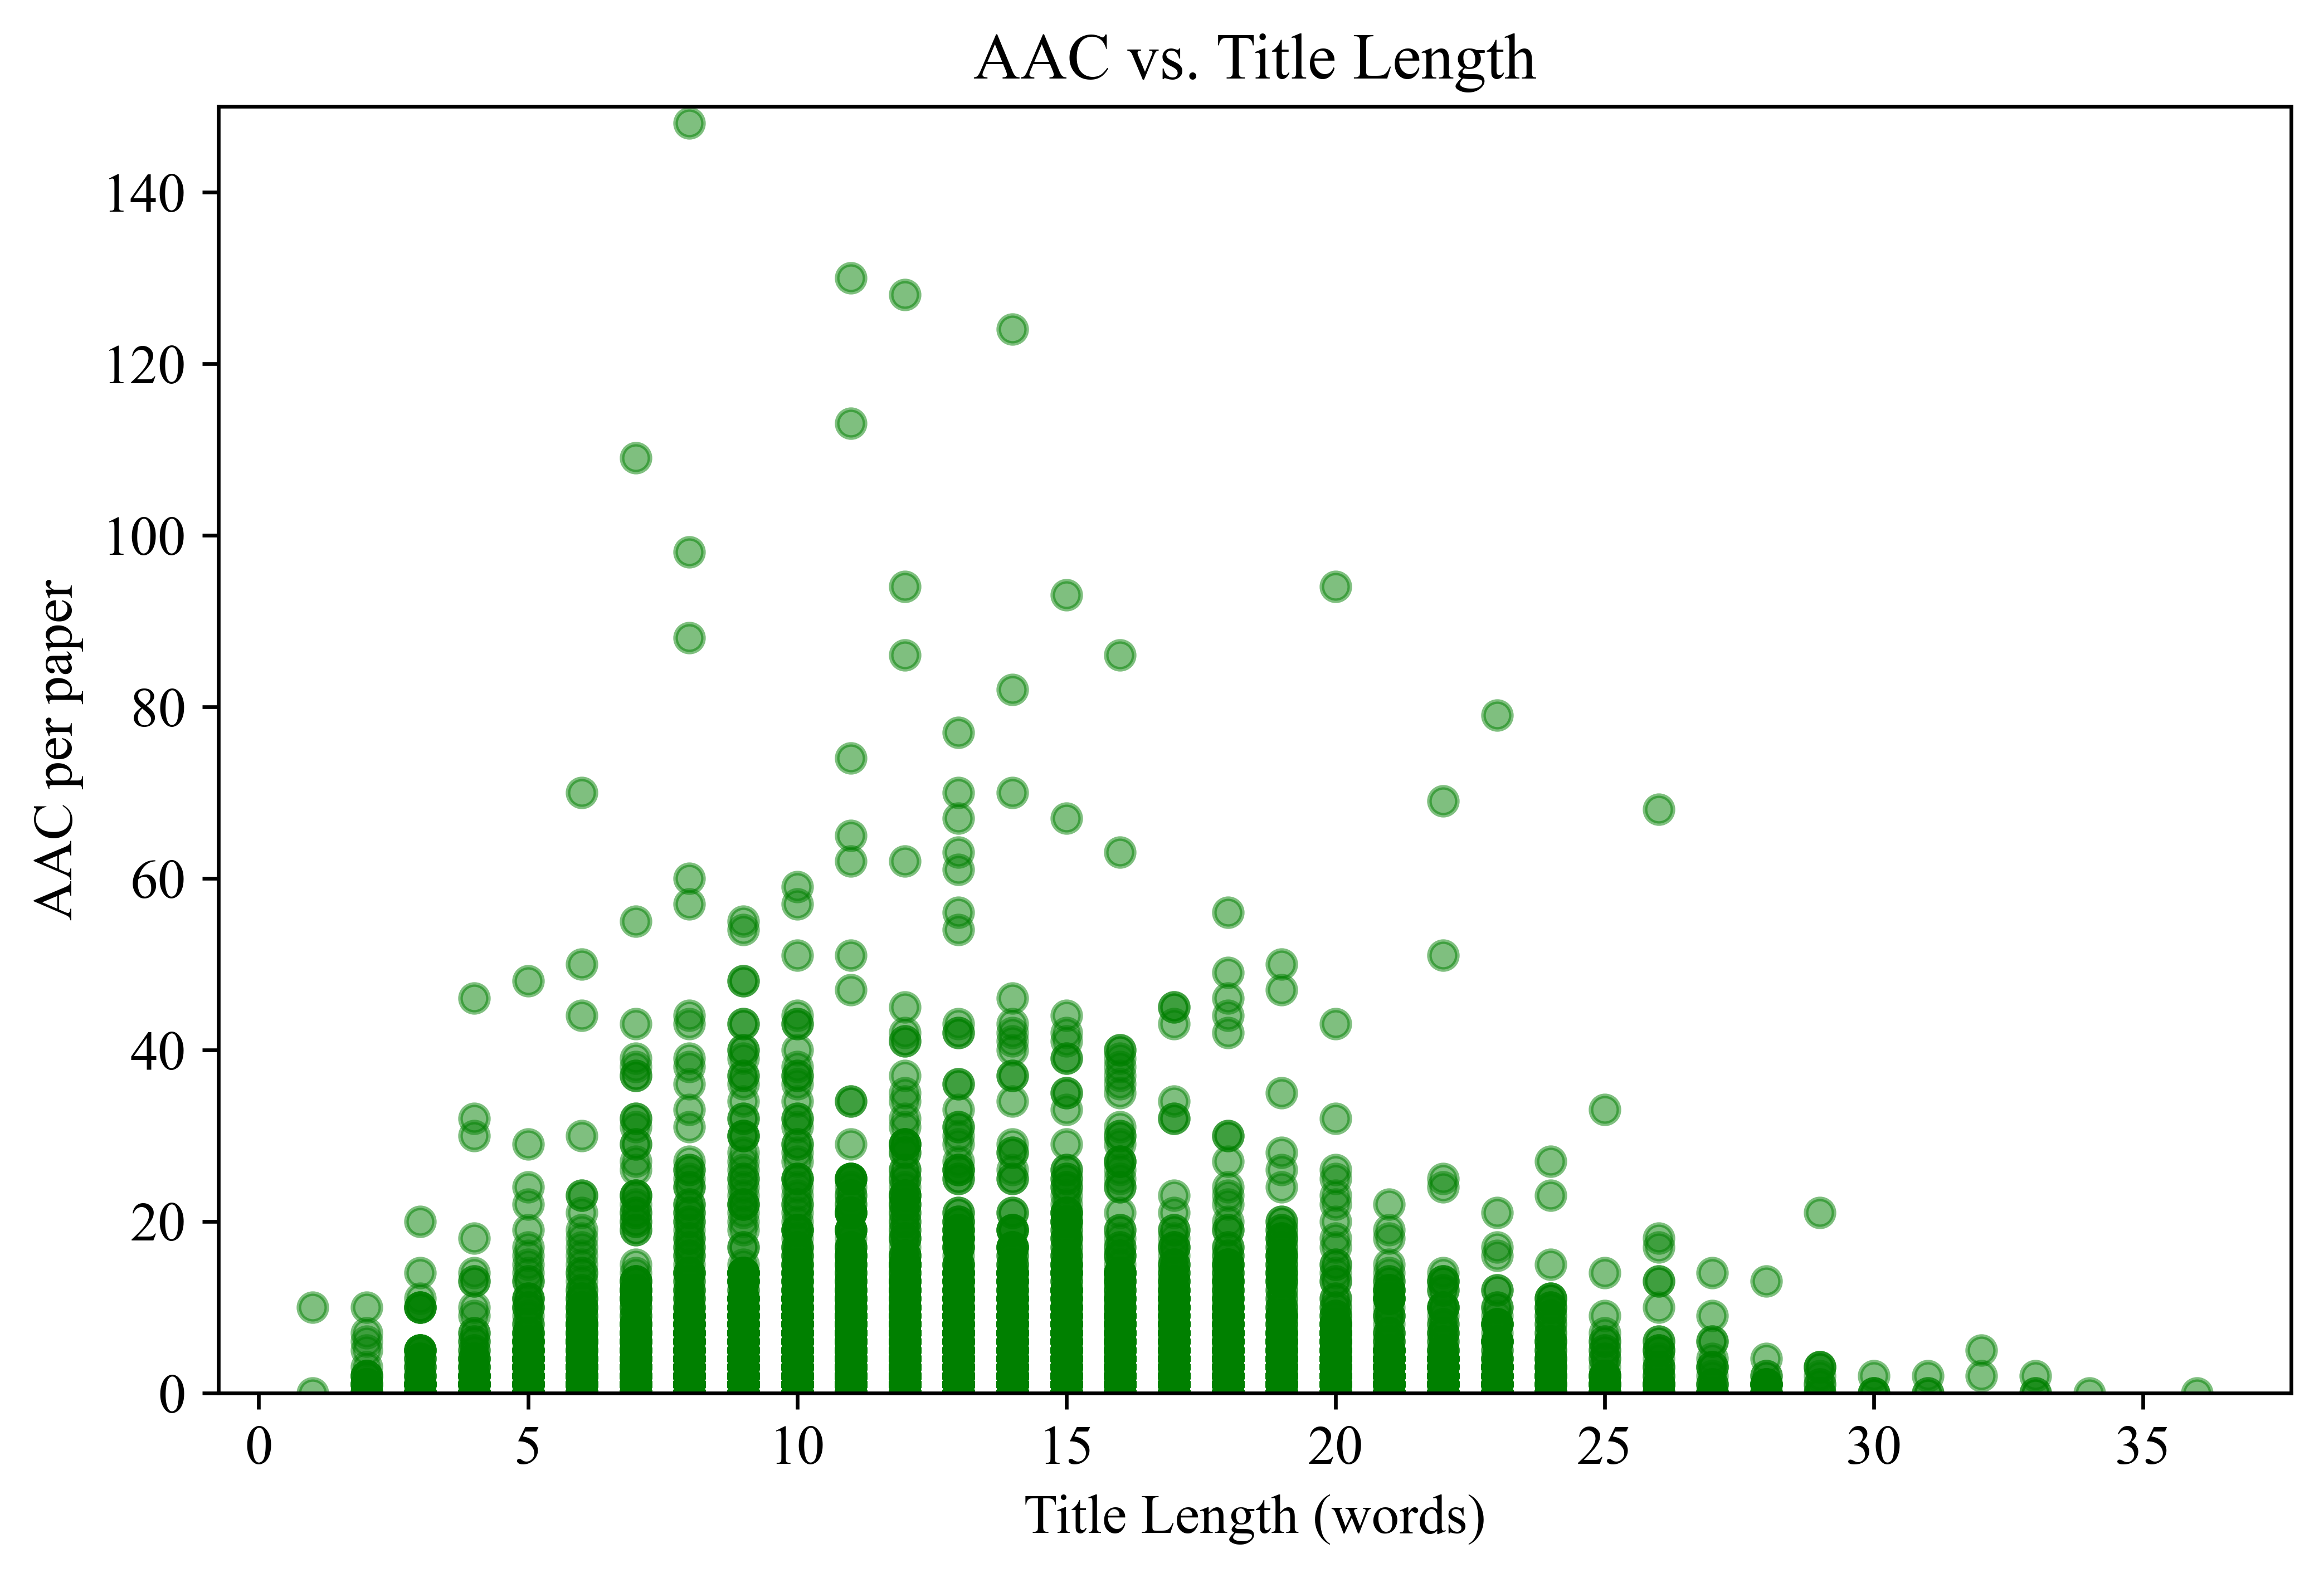

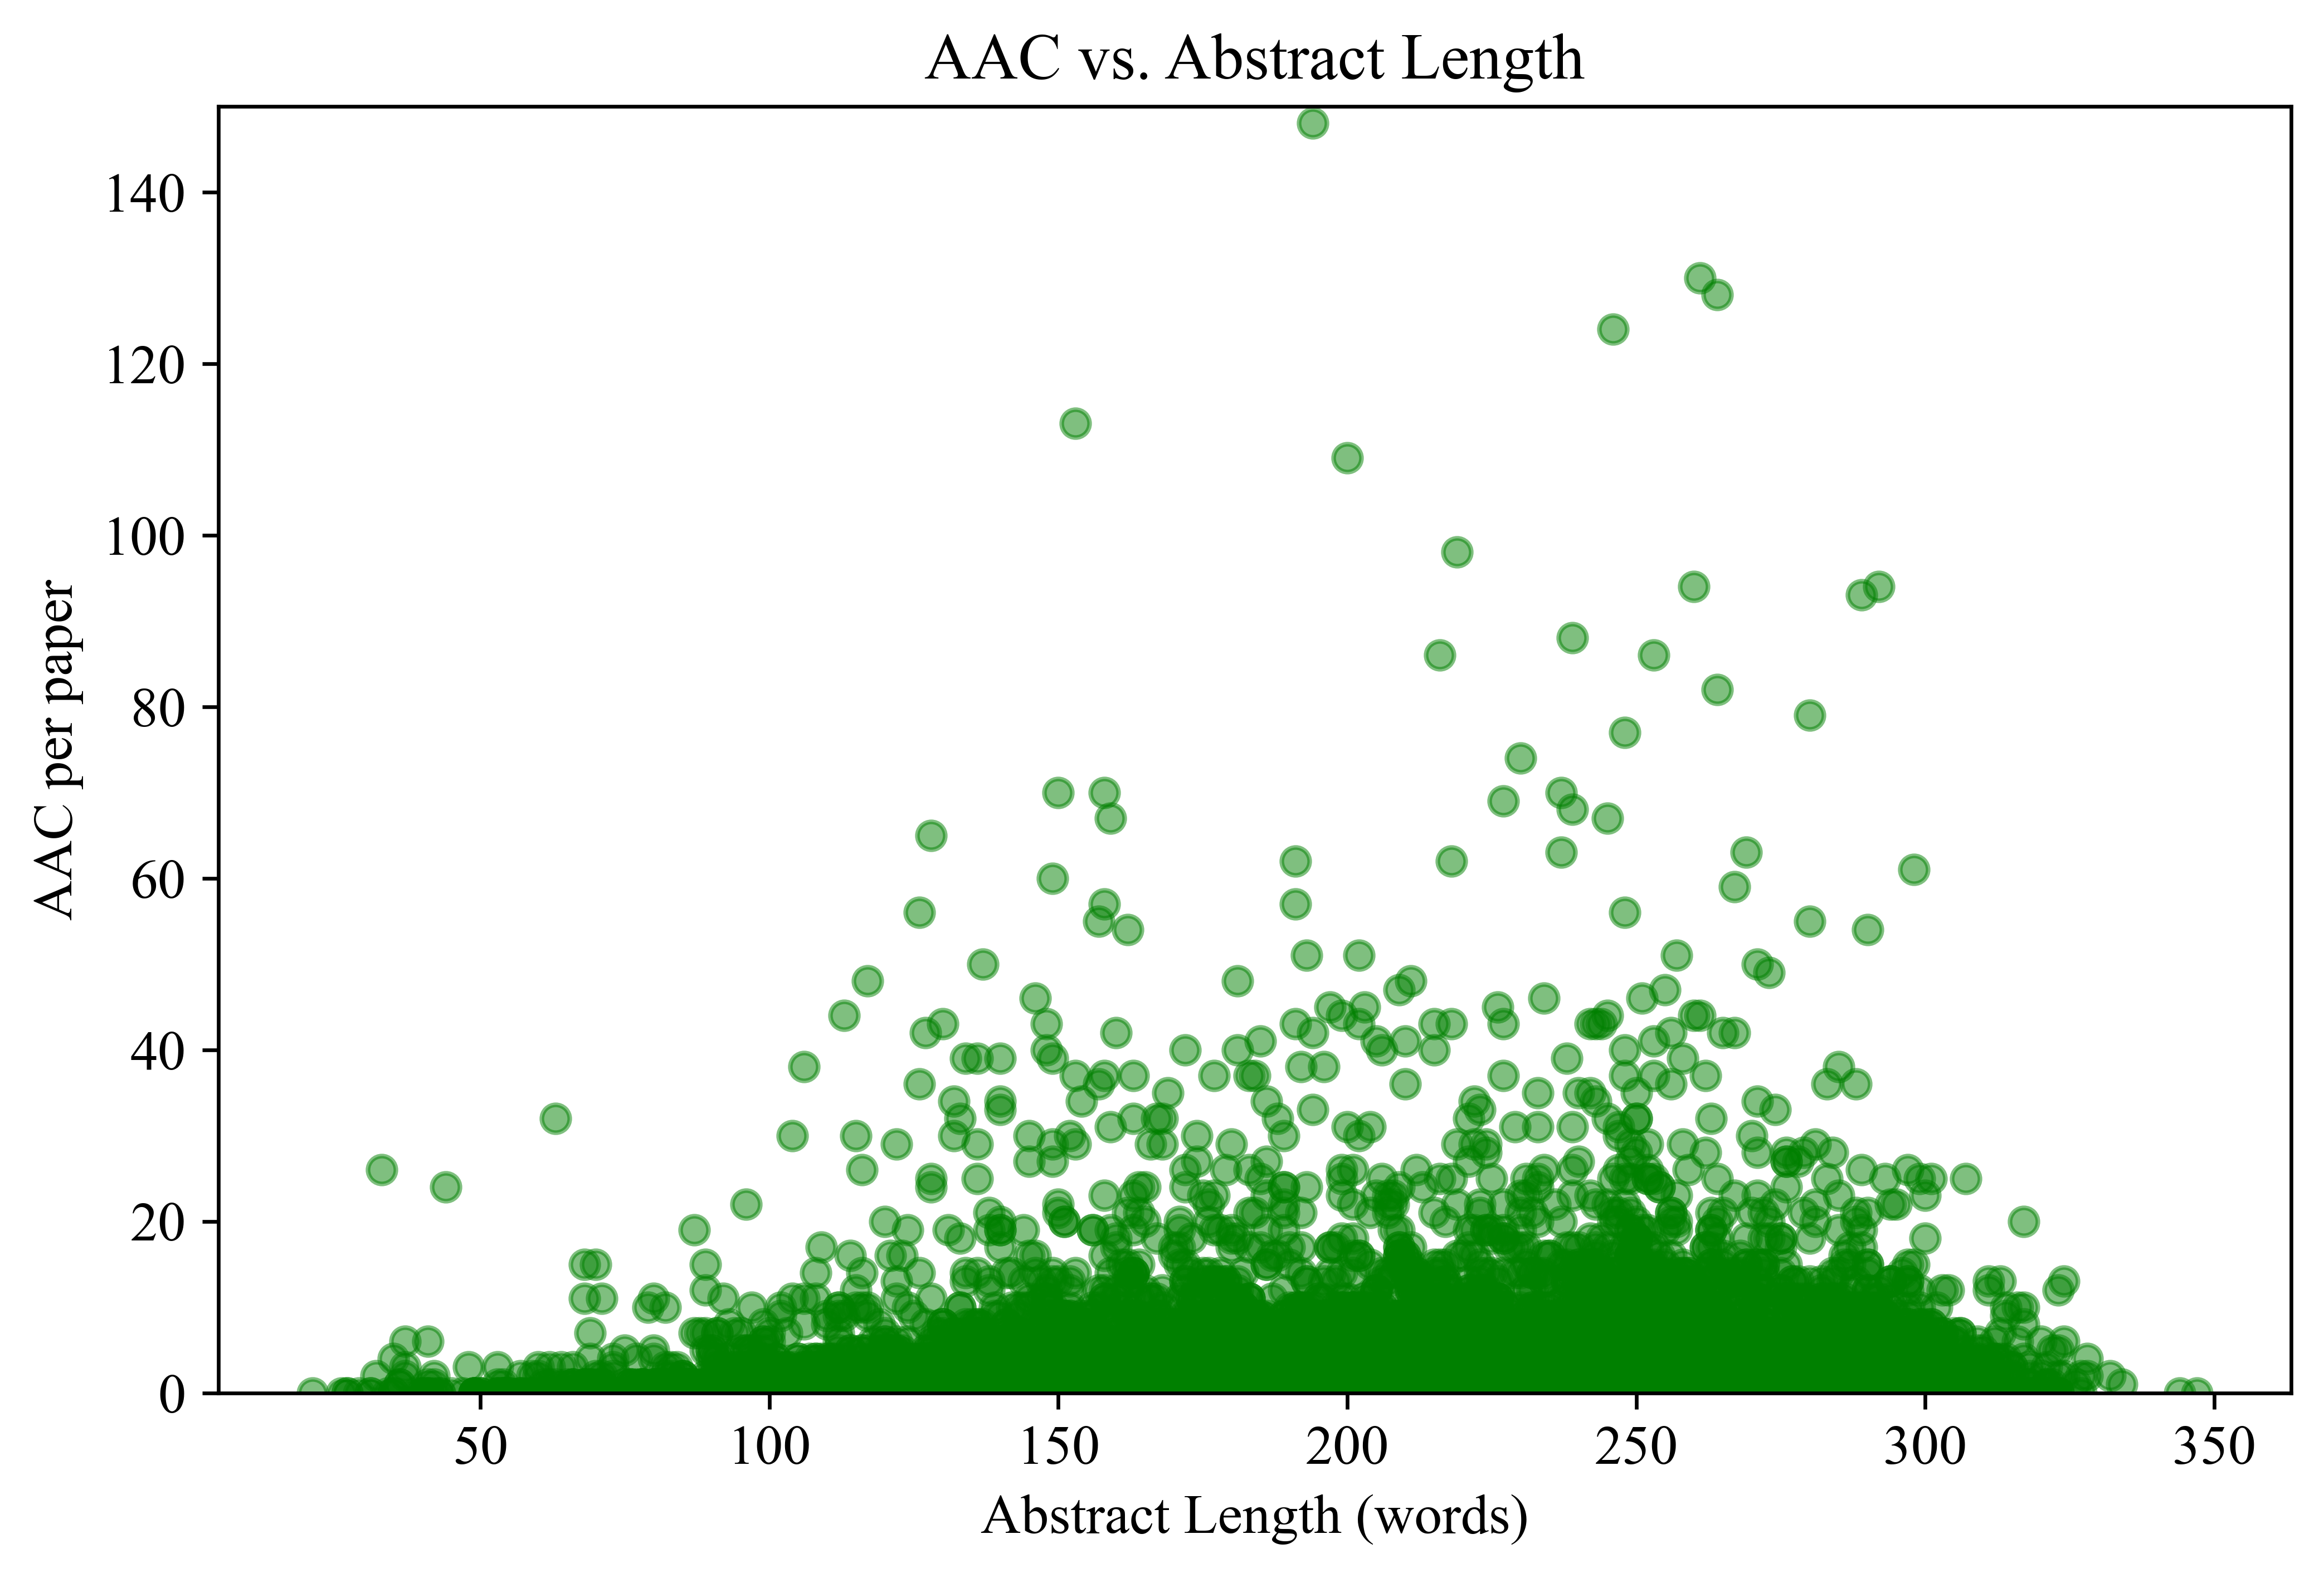

In [14]:
# Citation Analysis of Papers and Length of Title and Abstract

# Plot 1: AAC vs Title Length
plt.figure(figsize=(8, 5))
plt.scatter(data['title_length'], data['total_citations'], alpha=0.5, color='green')
plt.xlabel('Title Length (words)', fontsize=12)
plt.ylabel('AAC per paper', fontsize=12)
plt.ylim(0, 150)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('AAC vs. Title Length', fontsize=14)
plt.show()

# Plot 2: AAC vs Abstract Length
plt.figure(figsize=(8, 5))
plt.scatter(data['abstract_length'], data['total_citations'], alpha=0.5, color='green')
plt.xlabel('Abstract Length (words)', fontsize=12)
plt.ylabel('AAC per paper', fontsize=12)
plt.ylim(0, 150)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('AAC vs. Abstract Length', fontsize=14)
plt.show()

/var/folders/tm/964hg0yn70x0ddsqcj4bsf8r0000gn/T/ipykernel_7447/1438912542.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='title_length_bin', y='total_citations', data=data, palette='Greens', inner='quartile')
/var/folders/tm/964hg0yn70x0ddsqcj4bsf8r0000gn/T/ipykernel_7447/1438912542.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='abstract_length_bin', y='total_citations', data=data, palette='Greens', inner='quartile')


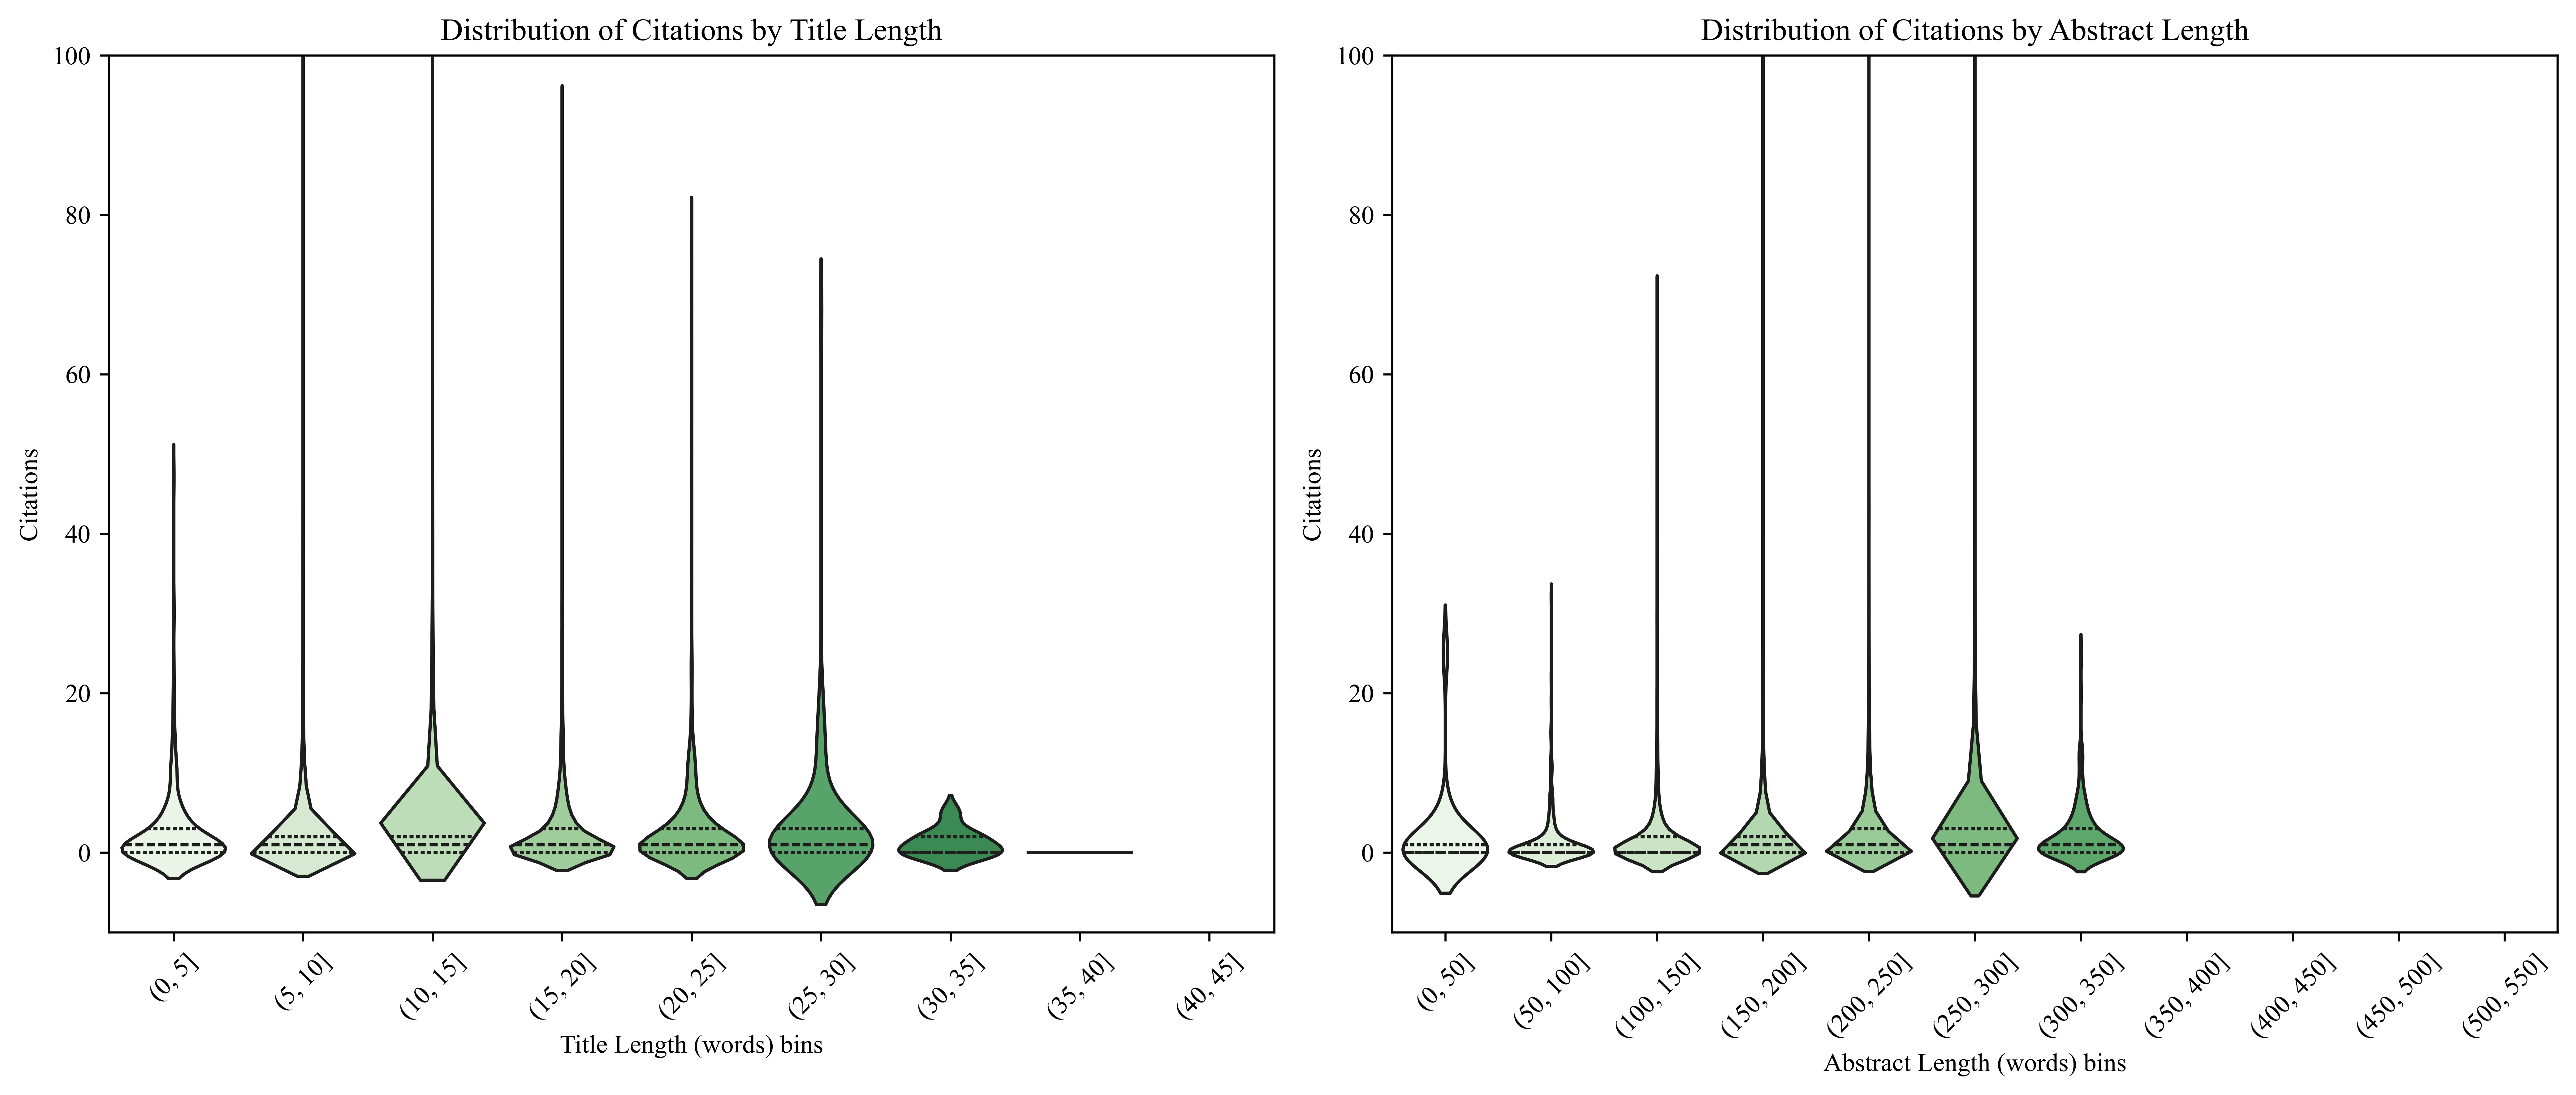

In [10]:
# Create bins for title and abstract lengths to facilitate violin plotting
data['title_length_bin'] = pd.cut(data['title_length'], bins=range(0, 50, 5))
data['abstract_length_bin'] = pd.cut(data['abstract_length'], bins=range(0, 600, 50))

plt.figure(figsize=(14, 6))

# Plot 1: Title Length vs AAC (Violin Plot)
plt.subplot(1, 2, 1)
sns.violinplot(x='title_length_bin', y='total_citations', data=data, palette='Greens', inner='quartile')
plt.xticks(rotation=45)
plt.xlabel('Title Length (words) bins')
plt.ylabel('Citations')
plt.ylim(-10, 100) # Limiting y-axis to see the distribution better, as extreme outliers compress the plot
plt.title('Distribution of Citations by Title Length')

# Plot 2: Abstract Length vs AAC (Violin Plot)
plt.subplot(1, 2, 2)
sns.violinplot(x='abstract_length_bin', y='total_citations', data=data, palette='Greens', inner='quartile')
plt.xticks(rotation=45)
plt.xlabel('Abstract Length (words) bins')
plt.ylabel('Citations')
plt.ylim(-10, 100)
plt.title('Distribution of Citations by Abstract Length')

plt.tight_layout()
plt.show()

In [9]:
from scipy.stats import spearmanr
import numpy as np

# Drop rows with missing values
df_title = data[['title_length', 'total_citations']].dropna()
df_abstract = data[['abstract_length', 'total_citations']].dropna()

# Spearman rank correlations
rho_title, p_title = spearmanr(df_title['title_length'],
                               df_title['total_citations'])

rho_abstract, p_abstract = spearmanr(df_abstract['abstract_length'],
                                     df_abstract['total_citations'])

print("Spearman Rank Correlation Results")
print("---------------------------------")
print(f"Title Length vs Citations:  ρ = {rho_title:.3f}, p-value = {p_title:.3e}")
print(f"Abstract Length vs Citations:  ρ = {rho_abstract:.3f}, p-value = {p_abstract:.3e}")

Spearman Rank Correlation Results
---------------------------------
Title Length vs Citations:  ρ = 0.051, p-value = 2.900e-12
Abstract Length vs Citations:  ρ = 0.121, p-value = 1.171e-61
